60-feature dataset

In [1]:
import pandas as pd
import sys
sys.path.append("..")
from tools.feature_selection import feat_select
from tools.feature_selection import rfe_select
from tools import data_parser as dp

In [2]:
bert_data = "../data/combined_bert_df.csv"
df = pd.read_csv(bert_data)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
Y = temp

In [3]:
%%time
reduced_data = feat_select(X,Y,60)

CPU times: total: 0 ns
Wall time: 21 ms


In [4]:
reduced_data.shape

(177, 60)

In [7]:
%%time
rfe_reduced = rfe_select(X,Y,60)

CPU times: total: 5min 30s
Wall time: 8min 34s


In [8]:
rfe_reduced.shape

(60,)

In [9]:
X_new = X.loc[:,rfe_reduced]

In [10]:
X_new.shape

(177, 60)

In [11]:
X_new.to_csv("../data/combined_datasets_60.csv", index=False)

In [2]:
import sys

import seaborn as sns

sys.path.append("..")
from tools import data_parser as dp
import joblib
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from statistics import mean
from randomforest import random_forest_CV as rf
from data_visualisation import rf_vis

In [2]:
bert_data_512 = "../data/combined_bert_df.csv"
bert_data_60 = "../data/combined_datasets_60.csv"
df = pd.read_csv(bert_data_60)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Validation MAE: 4.125 (0.657)
Validation R2: 0.070 (0.313)
Validation Pearsonr: 0.437 (0.281)
Test MAE: 3.374
Test R2: 0.401
Test Pearsonr: 0.714
CPU times: total: 5.88 s
Wall time: 1min 35s


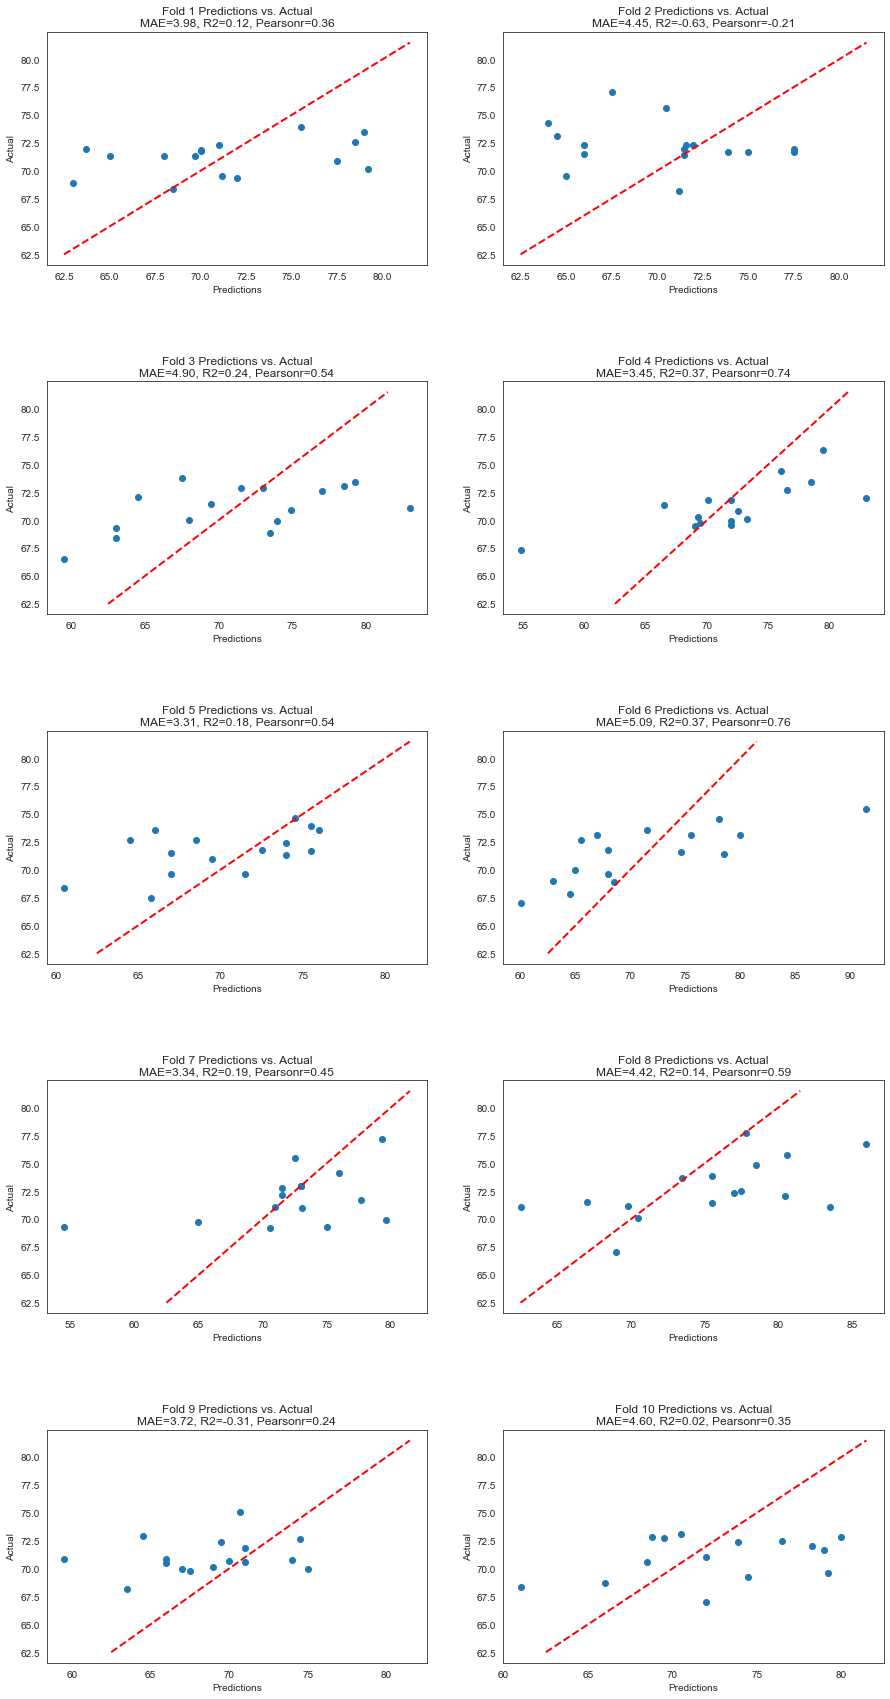

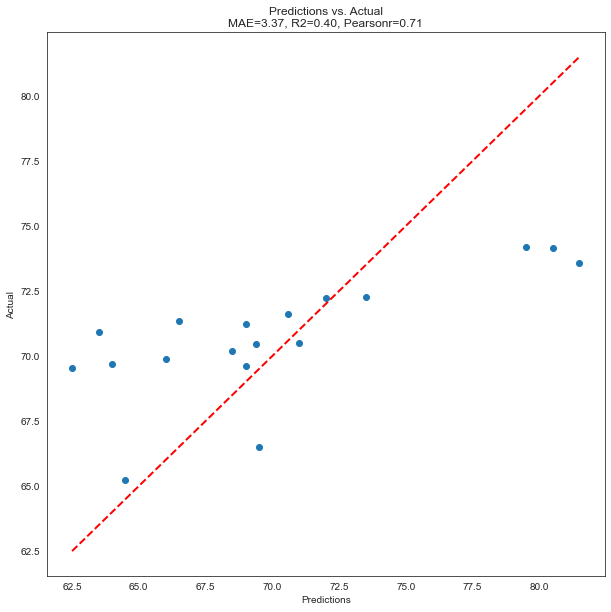

In [4]:
%%time
model = rf.rf_cv(X, y)

In [5]:
import sys
sys.path.append("..")
from SVM import svm_cv
import pandas as pd
from tools import data_parser as dp

Validation MAE: 4.309 (0.967)
Validation R2: -0.023 (0.198)
Validation Pearsonr: 0.232 (0.232)
Test MAE: 3.967
Test R2: 0.222
Test Pearsonr: 0.695


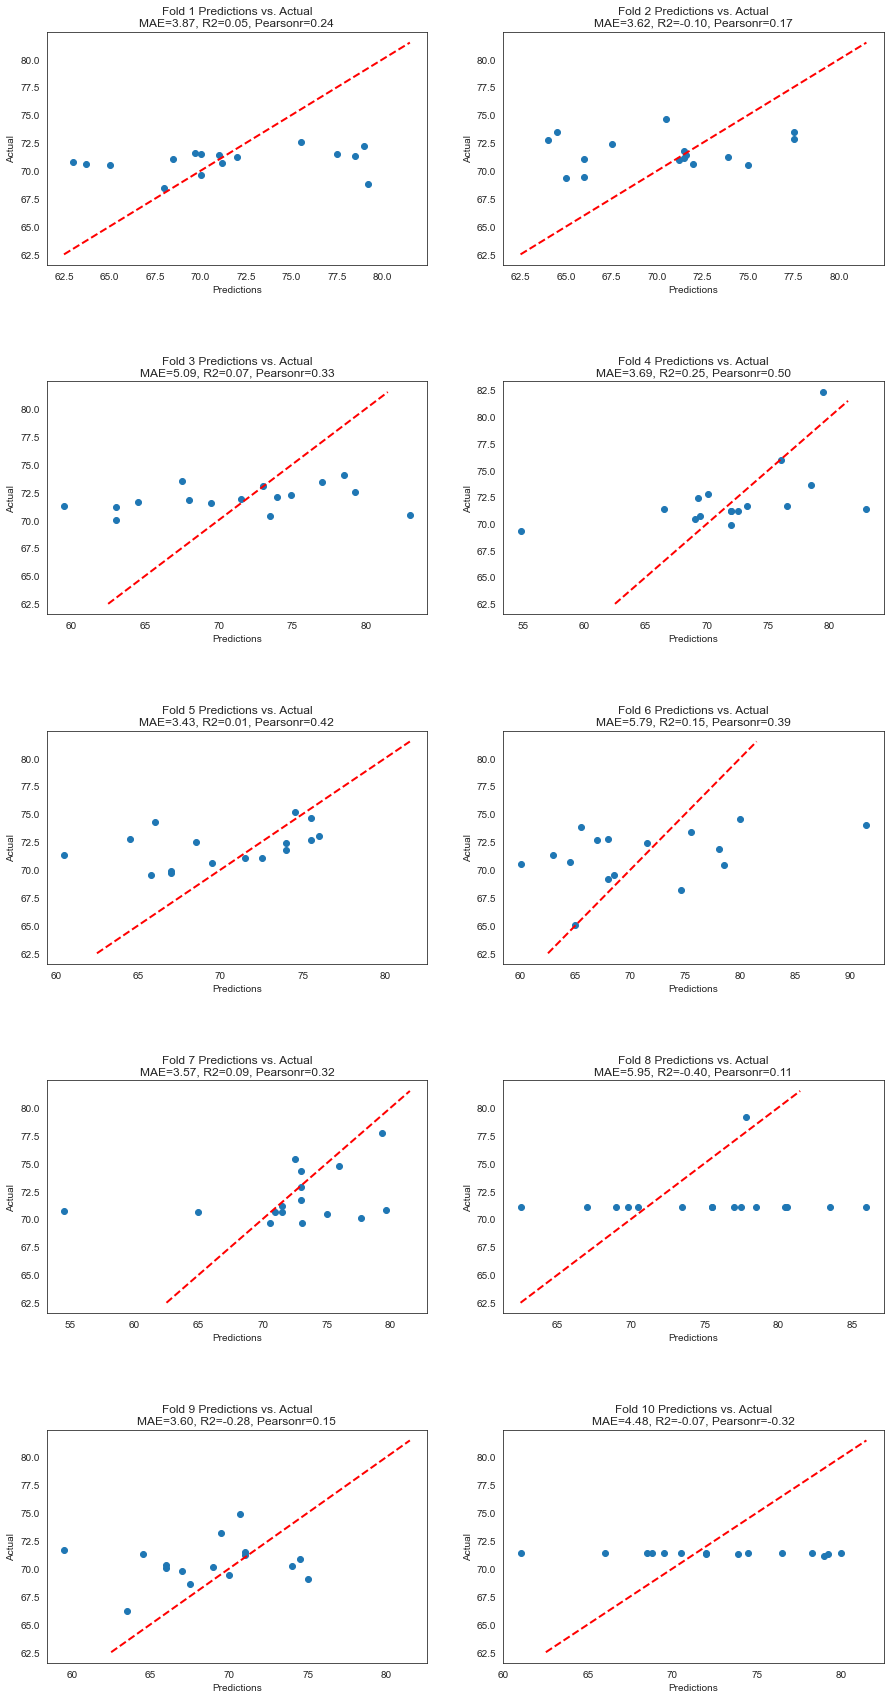

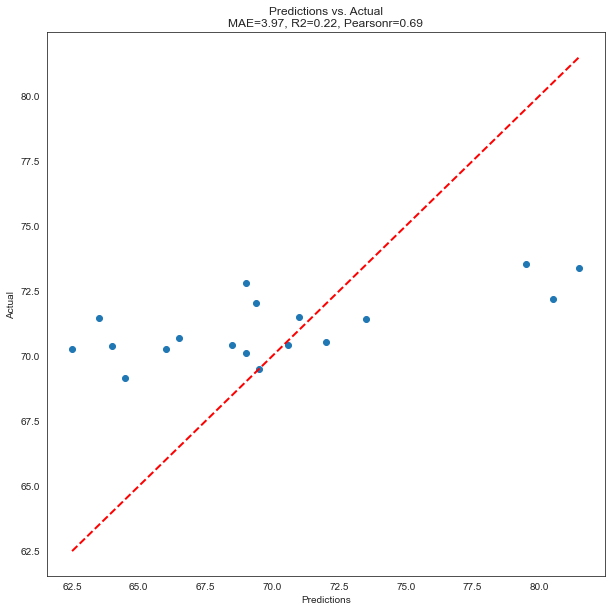

In [6]:
svm_model = svm_cv(X,y)

In [7]:
import joblib

In [8]:
joblib.dump(svm_model, "../models/05062023_svm_60.joblib")
joblib.dump(model, "../models/05062023_rf_60.joblib")

['../models/05062023_rf_60.joblib']

In [25]:
from scipy.stats import stats
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt


def gradient_boosting_regression(X, y):
    """Gradient Boosting for regression

    Parameters
    ----------
    X : array-like of shape = [n_samples, n_features]
        The training input samples.
    y : array-like, shape = [n_samples]
        The target values (real numbers in regression).

    Returns
    -------
    reg : regression model.
    """
    params = {
        "n_estimators": 5000,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.01,
        "loss": "squared_error",
    }
    sns.set_style(style='white')

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=13
    )

    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)

    mse = mean_squared_error(y_test, reg.predict(X_test))
    mae = mean_absolute_error(y_test, reg.predict(X_test))
    pearsonr = stats.pearsonr(y_test, reg.predict(X_test))
    r2 = r2_score(y_test, reg.predict(X_test))

    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
    print("The pearson coeffieicent on test set: {:.4f}".format(pearsonr[0]))
    print("The r2 on test set: {:.4f}".format(r2))

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(reg.staged_predict(X_test)):
        test_score[i] = mean_absolute_error(y_test, y_pred)

    fig = plt.figure(figsize=(6, 6))
    plt.subplot(1, 1, 1)
    plt.title("Deviance")
    plt.plot(
        np.arange(params["n_estimators"]) + 1,
        reg.train_score_,
        "b-",
        label="Training Set Deviance"
    )
    plt.legend(loc="upper right")
    plt.xlabel("Boosting Iterations")
    plt.ylabel("Deviance")
    fig.tight_layout()
    plt.show()

    # plot actual vs predicted
    fig = plt.figure(figsize=(6, 6))
    plt.subplot(1, 1, 1)
    plt.scatter(reg.predict(X_test),y_test, alpha=0.5)
    plt.plot([60,80], [60,80], 'r--', lw=2)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title(f'Predictions vs. Actual\nMAE={mae:.2f}, R2={r2:.2f}, Pearsonr={pearsonr[0]:.2f}')
    fig.tight_layout()
    plt.show()

    return reg

C:\Users\toon_\AppData\Local\Temp\ipykernel_34064\551005237.py:39: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  pearsonr = stats.pearsonr(y_test, reg.predict(X_test))


The mean squared error (MSE) on test set: 10.1592
The mean absolute error (MAE) on test set: 2.6080
The pearson coeffieicent on test set: 0.8415
The r2 on test set: 0.6356


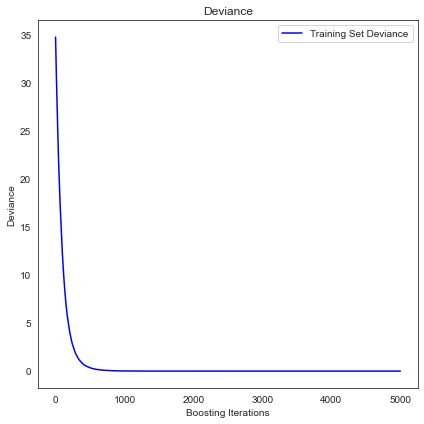

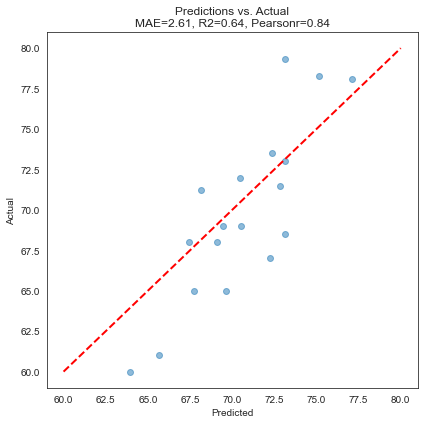

In [26]:
gb_model = gradient_boosting_regression(X,y)

In [27]:
from scipy.stats import probplot

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

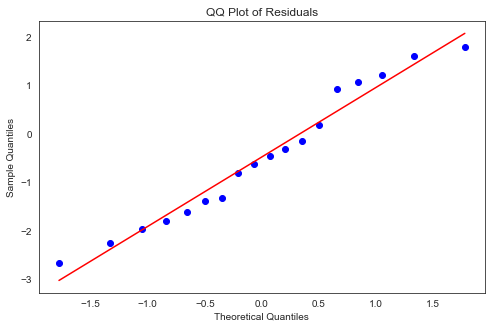

In [29]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# create QQ plot
fig, ax = plt.subplots(figsize=(8, 5))
probplot(residuals, plot=ax)
ax.set_title('QQ Plot of Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
plt.show()

In [30]:
joblib.dump(gb_model, "../models/05062023_gb_60.joblib")

['../models/05062023_gb_60.joblib']

In [3]:
from RNN import rnn_cv

Epoch 1/100
13/13 - 3s - loss: 70.3731 - val_loss: 67.7849 - 3s/epoch - 231ms/step
Epoch 2/100
13/13 - 0s - loss: 68.2464 - val_loss: 65.5125 - 157ms/epoch - 12ms/step
Epoch 3/100
13/13 - 0s - loss: 65.5692 - val_loss: 62.5202 - 145ms/epoch - 11ms/step
Epoch 4/100
13/13 - 0s - loss: 61.8480 - val_loss: 58.3254 - 146ms/epoch - 11ms/step
Epoch 5/100
13/13 - 0s - loss: 57.5956 - val_loss: 54.5455 - 157ms/epoch - 12ms/step
Epoch 6/100
13/13 - 0s - loss: 54.3198 - val_loss: 51.5925 - 157ms/epoch - 12ms/step
Epoch 7/100
13/13 - 0s - loss: 51.7700 - val_loss: 49.2848 - 160ms/epoch - 12ms/step
Epoch 8/100
13/13 - 0s - loss: 49.7508 - val_loss: 47.3425 - 160ms/epoch - 12ms/step
Epoch 9/100
13/13 - 0s - loss: 47.8793 - val_loss: 45.5007 - 170ms/epoch - 13ms/step
Epoch 10/100
13/13 - 0s - loss: 46.0818 - val_loss: 43.7235 - 146ms/epoch - 11ms/step
Epoch 11/100
13/13 - 0s - loss: 44.3729 - val_loss: 42.0480 - 134ms/epoch - 10ms/step
Epoch 12/100
13/13 - 0s - loss: 42.7209 - val_loss: 40.4123 - 157

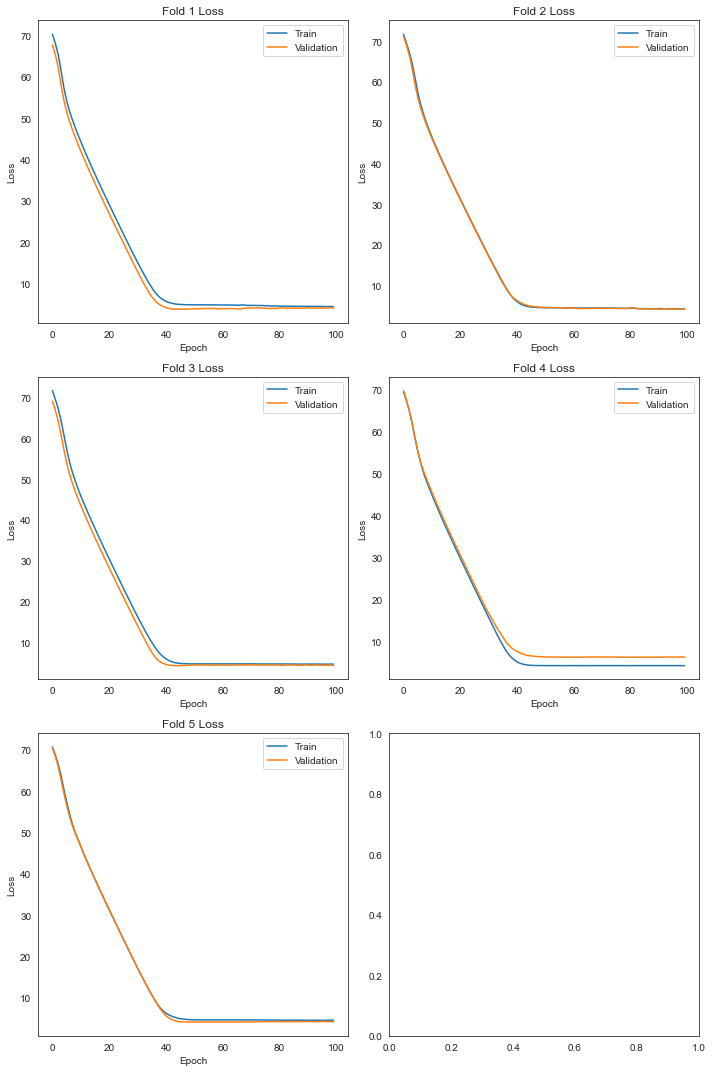

MAE: 4.653 (0.142)
R2: -0.034 (0.045)
Pearsonr: 0.195 (0.165)


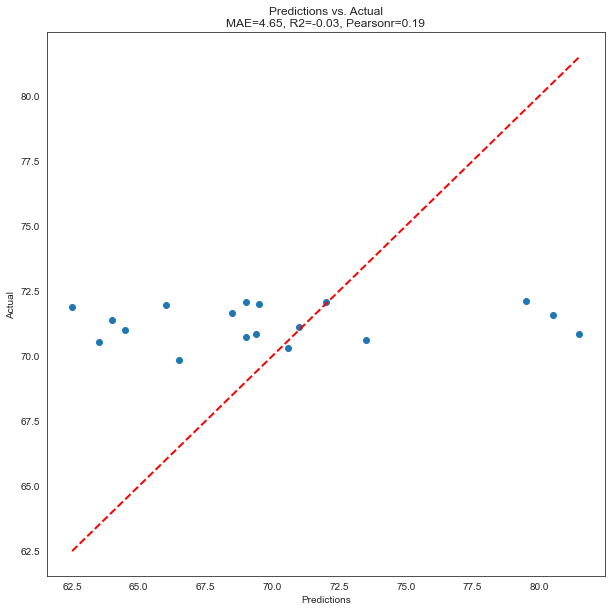

In [4]:
rnn_cv(X,y)